In [1]:
import sys
import os
sys.path.insert(0, os.path.join(os.getcwd(), '../src'))

import numpy as np
import matplotlib.pyplot as plt

# import kamino.seafloor_weathering.chili.plot_example

from kamino.seafloor_weathering.weathering import *
from kamino.constants import YR

In [2]:
cmap='turbo'
vmin_log = -4.5
vmax_log = 1.5

In [ ]:
T_range = np.linspace(274, 340, num=20)
pco2_range = np.logspace(-2, 5, num=20)
W_H21 = np.zeros((20,20))
W_WHAK = np.zeros((20,20))

for i, T in enumerate(T_range):
    for j, pco2 in enumerate(pco2_range):
        W_H21[i, j] = get_weathering_rate(1e6, T, pco2 / 1e5, 0.05, 100, 50e6)
        W_WHAK[i, j] = get_weathering_rate_KT18(1e6, T, pco2 / 1e5)

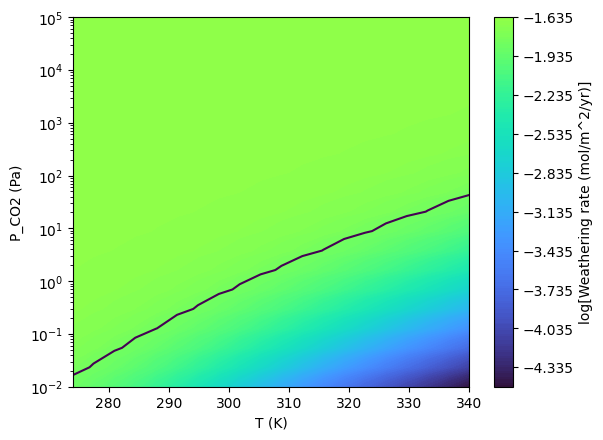

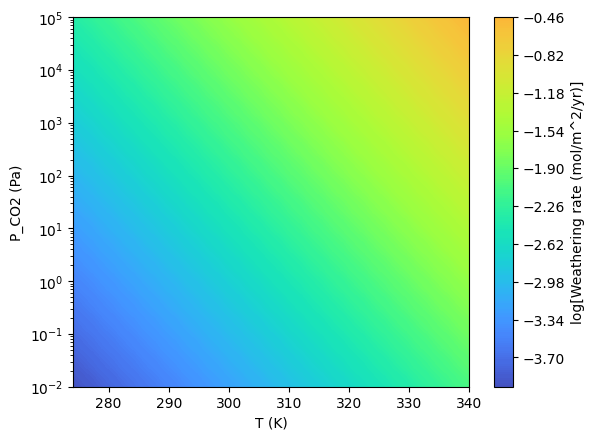

In [ ]:
plt.contourf(T_range, pco2_range, np.log10(W_H21.T), 200, cmap=cmap, vmin=vmin_log, vmax=vmax_log)
plt.colorbar(label='log[Weathering rate (mol/m^2/yr)]')
plt.contour(T_range, pco2_range, np.log10(W_H21.T), [np.log10(0.0147)])
plt.xlabel('T (K)')
plt.ylabel('P_CO2 (Pa)')
plt.yscale('log')
plt.show()

plt.contourf(T_range, pco2_range, np.log10(W_WHAK.T), 200, cmap=cmap, vmin=vmin_log, vmax=vmax_log)
plt.colorbar(label='log[Weathering rate (mol/m^2/yr)]')
plt.xlabel('T (K)')
plt.ylabel('P_CO2 (Pa)')
plt.yscale('log')
plt.show()

In [ ]:
t_rock_range = np.logspace(1, 8, num=20)
flow_rate_range = np.logspace(-3, 0, num=20)
W_H21 = np.zeros((20,20))

for i, t_rock in enumerate(t_rock_range):
    for j, flow_rate in enumerate(flow_rate_range):
        W_H21[i, j] = get_weathering_rate(1e6, 288, 280 * 1e-6, flow_rate, 100, t_rock)

In [ ]:
plt.contourf(t_rock_range, flow_rate_range, np.log10(W_H21.T), 200, cmap=cmap, vmin=vmin_log, vmax=vmax_log)
plt.colorbar(label='log[Weathering rate (mol/m^2/yr)]')
plt.xlabel('t_rock (yr)')
plt.ylabel('Flow rate (m/yr)')
plt.yscale('log')
plt.xscale('log')
plt.show()

In [ ]:
T_range = np.linspace(274, 340, num=20)
pco2_range = np.logspace(-1, 4, num=20)
W_H21_high_runoff = np.zeros((20,20))
W_H21_new_rocks = np.zeros((20,20))
W_H21_active = np.zeros((20,20))

for i, T in enumerate(T_range):
    for j, pco2 in enumerate(pco2_range):
        W_H21_high_runoff[i, j] = get_weathering_rate(1e6, T, pco2 / 1e5, 1, 100, 50e6)
        W_H21_new_rocks[i, j] = get_weathering_rate(1e6, T, pco2 / 1e5, 0.05, 100, 0)
        W_H21_active[i, j] = get_weathering_rate(1e6, T, pco2 / 1e5, 5, 1, 0)

In [ ]:
plt.contourf(T_range, pco2_range, np.log10(W_H21_high_runoff.T), 200, cmap=cmap, vmin=vmin_log, vmax=vmax_log)
plt.colorbar(label='log[Weathering rate (mol/m^2/yr)]')
plt.xlabel('T (K)')
plt.ylabel('P_CO2 (Pa)')
plt.yscale('log')
plt.show()

plt.contourf(T_range, pco2_range, np.log10(W_H21_new_rocks.T), 200, cmap=cmap, vmin=vmin_log, vmax=vmax_log)
plt.colorbar(label='log[Weathering rate (mol/m^2/yr)]')
plt.xlabel('T (K)')
plt.ylabel('P_CO2 (Pa)')
plt.yscale('log')
plt.show()

plt.contourf(T_range, pco2_range, np.log10(W_H21_new_rocks.T), 200, cmap=cmap) #, vmin=vmin_log, vmax=vmax_log)
plt.colorbar(label='log[Weathering rate (mol/m^2/yr)]')
plt.xlabel('T (K)')
plt.ylabel('P_CO2 (Pa)')
plt.yscale('log')
plt.show()

In [ ]:
from kamino.speedy_climate.clima_interpolator import get_T_surface
from kamino.utils import *
from scipy.optimize import newton

In [ ]:
def solve_climate_from_CO2(self, P_CO2: float, T_init: float=288) -> tuple[float, float]:

        def T_s_residual(T_val):
            T_calc = get_T_surface(self.instellation, P_CO2, self.albedo, tidally_locked=self.tidally_locked)
            return T_val - T_calc
        
        T_s = float(newton(T_s_residual, T_init))
        P_H2O = august_roche_magnus_formula(T_s) * 0.5

        return T_s, P_H2O